In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imd
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [7]:
plt.style.use('ggplot')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

In [18]:
model1 = tf.keras.models.load_model('model1.h5')
model2 = tf.keras.models.load_model('model2.h5')
model3 = tf.keras.models.load_model('model3.h5')

In [2]:
import os 
from tqdm import tqdm
from PIL import Image

In [3]:
path = 'test'
name = os.listdir(path)
image_name = []
label_name = []
for i in tqdm(name):
    new = os.path.join(path,i)
    for j in os.listdir(new):
        new_ = os.path.join(new,j)
        image_name.append(new_)
        label_name.append(i)        

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 47.08it/s]


In [5]:
data = pd.DataFrame({
    'image_name': image_name,
    'label': label_name
})
data.head()

,image_name,label
0,test\hit\hit4437.jpg,hit
1,test\hit\hit4438.jpg,hit
2,test\hit\hit4439.jpg,hit
3,test\hit\hit4440.jpg,hit
4,test\hit\hit4441.jpg,hit


In [20]:
def Resnet152_Process(img_path, target_size=(224, 224)):
    img = Image.open(img_path)
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0
    return img_array    

def Efficientnetb7_Process(img_path, target_size=(128, 128)):
    img = Image.open(img_path)
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0
    return img_array    

(-0.5, 319.5, 239.5, -0.5)

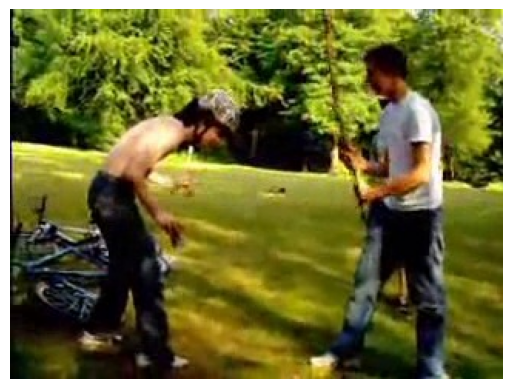

In [11]:
plt.imshow(imd.imread(data.image_name[0]))
plt.axis('off')

In [21]:
img = Resnet152_Process(data.image_name[0])
img = np.expand_dims(img, axis=0)

In [22]:
img2 = Efficientnetb7_Process(data.image_name[0])
img2 = np.expand_dims(img2, axis=0)

In [23]:
res1 = model1.predict(img)
res2 = model2.predict(img)
res3 = model3.predict(img2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


In [28]:
import pickle
with open('index_to_class.pkl', 'rb') as f:
    classes = pickle.load(f)

In [29]:
classes

{0: 'hit',
 1: 'kick',
 2: 'punch',
 3: 'push',
 4: 'ride_horse',
 5: 'shoot_gun',
 6: 'stand',
 7: 'wave'}

In [40]:
print('Model 1 Predict: ',classes[int(np.argmax(res1,axis=1))])
print('Model 2 Predict: ',classes[int(np.argmax(res2,axis=1))])
print('Model 3 Predict: ',classes[int(np.argmax(res3,axis=1))])

Model 1 Predict:  hit
Model 2 Predict:  hit
Model 3 Predict:  hit


In [42]:
def predict(image):    
    # For Rsnet
    img = Resnet152_Process(image)
    img = np.expand_dims(img, axis=0)
    # For Efficientnetb7
    img2 = Efficientnetb7_Process(data.image_name[0])
    img2 = np.expand_dims(img2, axis=0)
    # Predict Image With Different model
    res1 = model1.predict(img)
    res2 = model2.predict(img)
    res3 = model3.predict(img2)
    # Show Result
    print('Model 1 Predict: ',classes[int(np.argmax(res1,axis=1))])
    print('Model 2 Predict: ',classes[int(np.argmax(res2,axis=1))])
    print('Model 3 Predict: ',classes[int(np.argmax(res3,axis=1))])

In [53]:
data.image_name[800]

'test\\punch\\punch8793.jpg'

In [52]:
predict(data.image_name[800])
# data.image_name[800]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Model 1 Predict:  punch
Model 2 Predict:  punch
Model 3 Predict:  hit


In [55]:
import cv2
cap = cv2.VideoCapture(0)
while True:
    res,frame = cap.read()
    cv2.imshow('img',frame)
    if cv2.waitKey(1) == 27:
        break
cap.release()
cv2.destroyAllWindows()